In [1]:
import re
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the file and write nodes as dict
def read_tsp_file(file_path):
    cities = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        node_coord_section = False
        for line in lines:
            line = line.strip()
            if line == "EOF":
                break
            if line.startswith("NODE_COORD_SECTION"):
                node_coord_section = True
            elif node_coord_section and line:
                parts = line.split()
                city_id = int(parts[0])
                x_coord = float(parts[1])
                y_coord = float(parts[2])
                cities[city_id] = (x_coord, y_coord)
    return cities


def read_tour_file(filename):
    with open(filename, 'r') as file:
        lines = file.read().splitlines()
    tour = []
    for line in lines:
        if line.startswith('TOUR_SECTION'):
            break
    for line in lines[lines.index('TOUR_SECTION') + 1:]:
        if line.strip() == '-1' or re.match(r'EOF', line.strip()):
            break
        tour.append(int(line.strip()))
    return tour

In [3]:
# use euclidean distance because in tsp file the EDGE_WEIGHT_TYPE is 'EUC_2D'
def euclidean_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def total_distance(path, cities):
    total_distance = 0
    for i in range(-1, len(path) - 1):
        total_distance += euclidean_distance(cities[path[i]], cities[path[i + 1]])
    return total_distance

def two_opt_swap(path, i, k):
    new_path = path[:i]
    new_path.extend(reversed(path[i:k + 1]))
    new_path.extend(path[k + 1:])
    return new_path

In [4]:
def simulated_annealing(cities, path, temperature = 100, cooling_rate = 0.99, min_temperature = 0.1, iterations=500):
     
    current_path = path   
    min_path = current_path.copy()
    min_distance = total_distance(min_path, cities)

    distances = []

    while temperature > min_temperature:
        for _ in range(iterations):
            i, k = sorted(random.sample(range(len(path)), 2))

            new_path = two_opt_swap(path, i, k)
            new_distance = total_distance(new_path, cities)

            # Decide whether to accept the new solution
            if new_distance < min_distance or random.random() < math.exp((min_distance - new_distance) / temperature):
                min_distance, path = new_distance, new_path
                if new_distance < total_distance(min_path, cities):
                    min_path = new_path.copy()

            distances.append(min_distance)

        temperature *= cooling_rate

    return min_path, min_distance, distances

For the case of 51 cities, the total distance is 438.34.
For the case of 280 cities, the total distance is 2921.52.
For the case of 442 cities, the total distance is 51857.25.


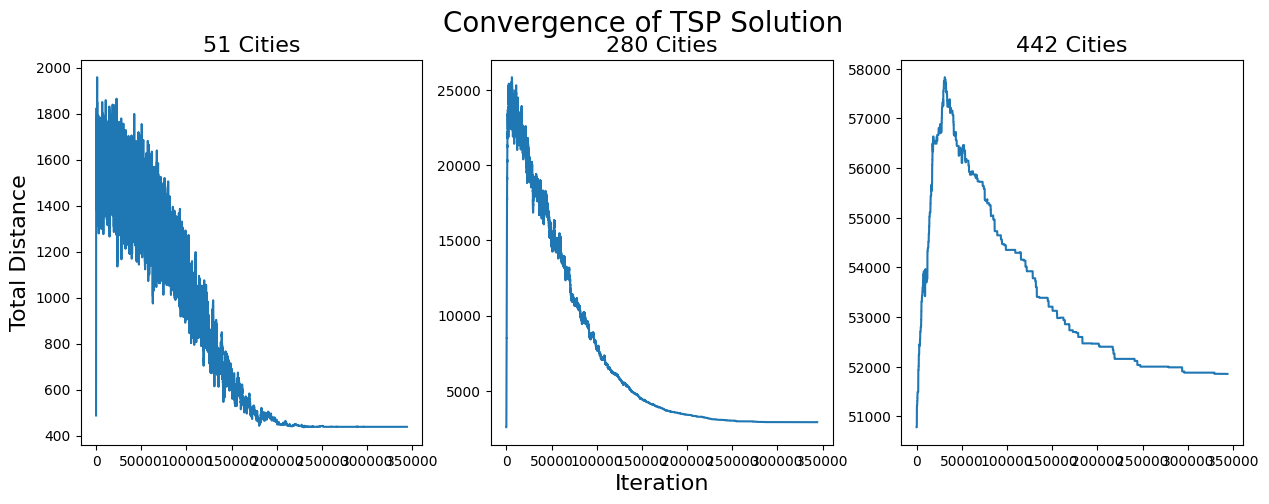

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

file_path_list = ['eil51.tsp.txt', 'a280.tsp.txt', 'pcb442.tsp.txt']
file_path_list2 = ['eil51.opt.tour.txt', 'a280.opt.tour.txt', 'pcb442.opt.tour.txt']

for i in range(3):
    cities = read_tsp_file(file_path_list[i])
    path = read_tour_file(file_path_list2[i])
    best_path, best_distance, distances = simulated_annealing(cities, path)
    
    print(f"For the case of {len(cities)} cities, the total distance is {best_distance:.2f}.")
    
    axs[i].plot(distances)

    axs[i].set_title(f"{len(cities)} Cities", fontsize=16)
    axs[1].set_xlabel("Iteration", fontsize=16)
    axs[0].set_ylabel("Total Distance", fontsize=16)
    
    
plt.suptitle("Convergence of TSP Solution", fontsize=20)    
plt.savefig("convergence", dpi=300)